In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt

pd.set_option('display.max_columns', None)

In [2]:
X_train = pd.read_csv('X_train.csv', index_col = 0)
X_train = X_train.reset_index(drop = True)
X_train = X_train.drop(['index', 'item_type', 'country_code', 'currency', 'inAlbum', 'genre', 'tags', 'day',
                       'coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)
X_train.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_2step,tags_80s,tags_acid,tags_acoustic,tags_afrobeat,tags_alternative,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_atmospheric,tags_atmosphericblackmetal,tags_avantgarde,tags_bass,tags_bassmusic,tags_beats,tags_berlin,tags_blackmetal,tags_blues,tags_breakbeat,tags_breaks,tags_brokenbeat,tags_chicago,tags_chillout,tags_chillwave,tags_coldwave,tags_comedy,tags_dance,tags_darkambient,tags_darktechno,tags_darkwave,tags_deathmetal,tags_deephouse,tags_disco,tags_diy,tags_doom,tags_downtempo,tags_dreampop,tags_drone,tags_drumbass,tags_dub,tags_dubstep,tags_ebm,tags_edm,tags_electro,tags_electronic,tags_electronica,tags_experimental,tags_folk,tags_funk,tags_garage,tags_hardcore,tags_hardrock,tags_hardtechno,tags_hiphop,tags_hiphop/rap,tags_house,tags_idm,tags_indie,tags_indierock,tags_london,tags_losangeles,tags_melbourne,tags_metal,tags_newyork,tags_other,tags_paris,tags_poppunk,tags_progressiverock,tags_punk,tags_rb,tags_rb/soul,tags_rock,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,4.69,9.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [3]:
X_valid = pd.read_csv('X_valid.csv', index_col = 0)
X_valid = X_valid.reset_index(drop = True)
X_valid = X_valid.drop(['index', 'item_type', 'country_code', 'currency', 'inAlbum', 'genre', 'tags', 'day',
                       'coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)
X_valid.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_2step,tags_80s,tags_acid,tags_acoustic,tags_afrobeat,tags_alternative,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_atmospheric,tags_atmosphericblackmetal,tags_avantgarde,tags_bass,tags_bassmusic,tags_beats,tags_berlin,tags_blackmetal,tags_blues,tags_breakbeat,tags_breaks,tags_brokenbeat,tags_chicago,tags_chillout,tags_chillwave,tags_coldwave,tags_comedy,tags_dance,tags_darkambient,tags_darktechno,tags_darkwave,tags_deathmetal,tags_deephouse,tags_disco,tags_diy,tags_doom,tags_downtempo,tags_dreampop,tags_drone,tags_drumbass,tags_dub,tags_dubstep,tags_ebm,tags_edm,tags_electro,tags_electronic,tags_electronica,tags_experimental,tags_folk,tags_funk,tags_garage,tags_hardcore,tags_hardrock,tags_hardtechno,tags_hiphop,tags_hiphop/rap,tags_house,tags_idm,tags_indie,tags_indierock,tags_london,tags_losangeles,tags_melbourne,tags_metal,tags_newyork,tags_other,tags_paris,tags_poppunk,tags_progressiverock,tags_punk,tags_rb,tags_rb/soul,tags_rock,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1.78,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [4]:
X_test = pd.read_csv('X_test.csv', index_col = 0)
X_test = X_test.reset_index(drop = True)
X_test = X_test.drop(['index', 'item_type', 'country_code', 'currency', 'inAlbum', 'genre', 'tags', 'day',
                       'coded_country_code', 'coded_currency', 'coded_genre', 'coded_tags'], axis = 1)
X_test.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_2step,tags_80s,tags_acid,tags_acoustic,tags_afrobeat,tags_alternative,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_atmospheric,tags_atmosphericblackmetal,tags_avantgarde,tags_bass,tags_bassmusic,tags_beats,tags_berlin,tags_blackmetal,tags_blues,tags_breakbeat,tags_breaks,tags_brokenbeat,tags_chicago,tags_chillout,tags_chillwave,tags_coldwave,tags_comedy,tags_dance,tags_darkambient,tags_darktechno,tags_darkwave,tags_deathmetal,tags_deephouse,tags_disco,tags_diy,tags_doom,tags_downtempo,tags_dreampop,tags_drone,tags_drumbass,tags_dub,tags_dubstep,tags_ebm,tags_edm,tags_electro,tags_electronic,tags_electronica,tags_experimental,tags_folk,tags_funk,tags_garage,tags_hardcore,tags_hardrock,tags_hardtechno,tags_hiphop,tags_hiphop/rap,tags_house,tags_idm,tags_indie,tags_indierock,tags_london,tags_losangeles,tags_melbourne,tags_metal,tags_newyork,tags_other,tags_paris,tags_poppunk,tags_progressiverock,tags_punk,tags_rb,tags_rb/soul,tags_rock,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,5.00,4.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [5]:
#standardize numerical columns: (value - mean) / std
dfs = [X_train, X_valid, X_test]
num_cols = ['item_price', 'numTracks', 'albumRelease']

for data in dfs:
    for x in num_cols:
        data[x] = (data[x] - np.mean(data[x])) / np.std(data[x])

In [6]:
X_train.head()

,item_price,numTracks,albumRelease,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_2step,tags_80s,tags_acid,tags_acoustic,tags_afrobeat,tags_alternative,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_atmospheric,tags_atmosphericblackmetal,tags_avantgarde,tags_bass,tags_bassmusic,tags_beats,tags_berlin,tags_blackmetal,tags_blues,tags_breakbeat,tags_breaks,tags_brokenbeat,tags_chicago,tags_chillout,tags_chillwave,tags_coldwave,tags_comedy,tags_dance,tags_darkambient,tags_darktechno,tags_darkwave,tags_deathmetal,tags_deephouse,tags_disco,tags_diy,tags_doom,tags_downtempo,tags_dreampop,tags_drone,tags_drumbass,tags_dub,tags_dubstep,tags_ebm,tags_edm,tags_electro,tags_electronic,tags_electronica,tags_experimental,tags_folk,tags_funk,tags_garage,tags_hardcore,tags_hardrock,tags_hardtechno,tags_hiphop,tags_hiphop/rap,tags_house,tags_idm,tags_indie,tags_indierock,tags_london,tags_losangeles,tags_melbourne,tags_metal,tags_newyork,tags_other,tags_paris,tags_poppunk,tags_progressiverock,tags_punk,tags_rb,tags_rb/soul,tags_rock,tags_spokenword,tags_techno,tags_unitedkingdom,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0.131991,0.279057,-0.379239,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
y_train = pd.read_csv('y_train.csv', index_col = 0)
y_train = y_train.reset_index(drop = True)

y_train = y_train['amount_paid_usd']

In [8]:
y_valid = pd.read_csv('y_valid.csv', index_col = 0)
y_valid = y_valid.reset_index(drop = True)

y_valid = y_valid['amount_paid_usd']

In [9]:
y_test = pd.read_csv('y_test.csv', index_col = 0)
y_test = y_test.reset_index(drop = True)

y_test = y_test['amount_paid_usd']

In [10]:
len(X_train), len(y_train), len(X_valid), len(y_valid), len(X_test), len(y_test)

(398130, 398130, 132710, 132710, 132711, 132711)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

### Optimizer & batch-size selection

In [12]:
def nn_model(o):
    model = Sequential()
    model.add(Dense(32, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(16, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = o)
    return model

In [13]:
batches = [25, 50, 75, 100, 150, 200]
optimizers = ['adam', 'RMSprop']

In [14]:
def train_nn(batch, optimizer):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    nn_mod = nn_model(o)
    print(nn_mod.summary())
    nn_mod.fit(X_train, y_train, batch_size = b, epochs = 100, validation_data = (X_valid, y_valid), callbacks=[es])
    pred = nn_mod.predict(X_valid)
    print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
    keras.backend.clear_session()

In [15]:
for b in batches:
    for o in optimizers:
        train_nn(b, o)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                8544      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,281
Trainable params: 9,185
Non-trainable params: 96
_______

Total params: 9,281
Trainable params: 9,185
Non-trainable params: 96
_________________________________________________________________
None
Epoch 1/100
3982/3982 [==============================] - 7s 2ms/step - loss: 18.9739 - val_loss: 13.8021
Epoch 2/100
3982/3982 [==============================] - 6s 1ms/step - loss: 16.7475 - val_loss: 13.7396
Epoch 3/100
3982/3982 [==============================] - 6s 1ms/step - loss: 16.6163 - val_loss: 13.6913
Epoch 4/100
3982/3982 [==============================] - 6s 1ms/step - loss: 16.4687 - val_loss: 13.7274
Epoch 5/100
3982/3982 [==============================] - 6s 1ms/step - loss: 16.4318 - val_loss: 13.7741
Epoch 6/100
3982/3982 [==============================] - 6s 1ms/step - loss: 16.3187 - val_loss: 13.6619
Epoch 7/100
3982/3982 [==============================] - 6s 1ms/step - loss: 16.2786 - val_loss: 13.6800
Epoch 8/100
3982/3982 [==============================] - 6s 1ms/step - loss: 16.2206 - val_loss: 13.7909
Epoch 9/100
3982/398

                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,281
Trainable params: 9,185
Non-trainable params: 96
_________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 5s 2ms/step - loss: 19.4104 - val_loss: 14.0276
Epoch 2/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.6682 - val_loss

#### Selected batch size: 150, optimizer = adam

### Architecture testing & activation function

In [16]:
activations = ['relu', keras.layers.LeakyReLU(), 'linear']
neurons = [32, 64, 128, 256, 512]

In [17]:
#1 Hidden layer
def nn_model1(n,a):
    model = Sequential()
    model.add(Dense(n, input_dim = X_train.shape[1], activation = a))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [18]:
def train_nn(neurons, activations):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for n in neurons:
        for a in activations:
            nn_mod = nn_model1(n,a)
            print(nn_mod.summary())
            nn_mod.fit(X_train, y_train, batch_size = 100, epochs = 50, validation_data=(X_valid, y_valid), callbacks=[es])
            pred = nn_mod.predict(X_valid)
            print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
            keras.backend.clear_session()

In [19]:
mod1 = train_nn(neurons, activations)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                8544      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,705
Trainable params: 8,641
Non-trainable params: 64
_________________________________________________________________
None
Epoch 1/50
3982/3982 [==============================] - 6s 1ms/step - loss: 17.8182 - val_loss: 13.9540
Epoch 2/50

 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                17088     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,409
Trainable params: 17,281
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/50
3982/3982 [==============================] - 6s 1ms/step - loss: 17.4166 - val_loss: 14.0535
Epoch 2/50
3982/3982 [==============================] - 6s 1ms/step - loss: 15.8597 - val_los

                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,817
Trainable params: 34,561
Non-trainable params: 256
_________________________________________________________________
None
Epoch 1/50
3982/3982 [==============================] - 8s 2ms/step - loss: 16.9087 - val_loss: 13.9129
Epoch 2/50
3982/3982 [==============================] - 7s 2ms/step - loss: 15.6752 - val_loss: 14.0780
Epoch 3/50
3982/3982 [==============================] - 7s 2ms/step - loss: 15.5811 - val_loss: 14.3001
Epoch 4/50
3982/3

None
Epoch 1/50
3982/3982 [==============================] - 10s 2ms/step - loss: 16.6255 - val_loss: 14.1010
Epoch 2/50
3982/3982 [==============================] - 9s 2ms/step - loss: 15.5608 - val_loss: 14.1431
Epoch 3/50
3982/3982 [==============================] - 9s 2ms/step - loss: 15.4307 - val_loss: 14.4654
Epoch 4/50
3982/3982 [==============================] - 9s 2ms/step - loss: 15.3459 - val_loss: 14.1625
Epoch 5/50
3982/3982 [==============================] - 9s 2ms/step - loss: 15.2804 - val_loss: 14.0872
Epoch 6/50
3982/3982 [==============================] - 9s 2ms/step - loss: 15.2149 - val_loss: 14.2810
Epoch 7/50
3982/3982 [==============================] - 9s 2ms/step - loss: 15.1551 - val_loss: 14.3623
Epoch 8/50
3982/3982 [==============================] - 9s 2ms/step - loss: 15.1186 - val_loss: 14.5749
Epoch 9/50
3982/3982 [==============================] - 9s 2ms/step - loss: 15.0835 - val_loss: 14.3699
Epoch 10/50
4148/4148 [==============================] - 3

 dense (Dense)               (None, 512)               136704    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 139,265
Trainable params: 138,241
Non-trainable params: 1,024
_________________________________________________________________
None
Epoch 1/50
3982/3982 [==============================] - 15s 4ms/step - loss: 16.6979 - val_loss: 14.0375
Epoch 2/50
3982/3982 [==============================] - 15s 4ms/step - loss: 15.7730 - val_loss: 14.1803
Epoch 3/50
3982/3982 [===========================

In [20]:
#2 hidden layers
def nn_model2(n,a):
    model = Sequential()
    model.add(Dense(n, input_dim = X_train.shape[1], activation = a))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    n = n/2
    model.add(Dense(n,  activation = a))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [21]:
def train_nn(neurons, activations):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for n in neurons:
        for a in activations:
            nn_mod = nn_model2(n,a)
            print(nn_mod.summary())
            nn_mod.fit(X_train, y_train, batch_size = 150, epochs = 100, validation_data=(X_valid, y_valid), callbacks=[es])
            pred = nn_mod.predict(X_valid)
            print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
            keras.backend.clear_session()

In [22]:
mod2 = train_nn(neurons, activations)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                8544      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

Total params: 9,281
Trainable params: 9,185
Non-trainable params: 96
_________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 5s 2ms/step - loss: 19.7993 - val_loss: 14.3301
Epoch 2/100
2655/2655 [==============================] - 4s 2ms/step - loss: 17.0775 - val_loss: 14.3193
Epoch 3/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.8916 - val_loss: 14.3226
Epoch 4/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.8516 - val_loss: 14.3180
Epoch 5/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.8184 - val_loss: 14.2961
Epoch 6/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.7986 - val_loss: 14.3001
Epoch 7/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.7311 - val_loss: 14.2912
Epoch 8/100
2655/2655 [==============================] - 4s 2ms/step - loss: 16.7197 - val_loss: 14.3111
Epoch 9/100
2655/265

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                17088     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
          

Epoch 7/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.6240 - val_loss: 13.6152
Epoch 8/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.6098 - val_loss: 13.6427
Epoch 9/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.5744 - val_loss: 13.5977
Epoch 10/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.5746 - val_loss: 13.5818
Epoch 11/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.5270 - val_loss: 13.5910
Epoch 12/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.5111 - val_loss: 13.5455
Epoch 13/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.4855 - val_loss: 13.5893
Epoch 14/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.4906 - val_loss: 13.5224
Epoch 15/100
2655/2655 [==============================] - 8s 3ms/step - loss: 15.4637 - val_loss: 13.6190
Epoch 16/100
2655/2655 [=========================

 dense (Dense)               (None, 512)               136704    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
          

In [23]:
#3 hidden layers

def nn_model3(n,a):
    model = Sequential()
    model.add(Dense(n, input_dim = X_train.shape[1], activation = a))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    n = n/2
    model.add(Dense(n,  activation = a))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    n = n/4
    model.add(Dense(n,  activation = a))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [24]:
def train_nn(neurons,activations):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for n in neurons:
        for a in activations:
            nn_mod = nn_model3(n,a)
            print(nn_mod.summary())
            nn_mod.fit(X_train, y_train, batch_size = 150, epochs = 100, validation_data=(X_valid, y_valid), callbacks=[es])
            pred = nn_mod.predict(X_valid)
            print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
            keras.backend.clear_session()

In [25]:
mod3 = train_nn(neurons, activations)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                8544      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

Total params: 9,353
Trainable params: 9,249
Non-trainable params: 104
_________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 7s 2ms/step - loss: 20.8188 - val_loss: 14.3242
Epoch 2/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.6490 - val_loss: 14.2941
Epoch 3/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.6017 - val_loss: 14.2938
Epoch 4/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.5597 - val_loss: 14.3365
Epoch 5/100
2655/2655 [==============================] - 5s 2ms/step - loss: 16.5602 - val_loss: 14.3533
Epoch 6/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.5383 - val_loss: 14.3081
Epoch 7/100
2655/2655 [==============================] - 6s 2ms/step - loss: 16.5274 - val_loss: 14.3085
Epoch 8/100
4148/4148 [==============================] - 2s 565us/step
RMSE on valid data: 3.7807101826117653
Model: "sequen

                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 19,857
Trainable params: 19,649
Non-trainable params: 208
_________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 8s 3ms/step - loss: 19.5791 - val_loss: 14.2989
Epoch 2/100
2655/2655 [==============================] - 7s 3ms/step - loss: 16.4257 - val_loss: 14.3234
Epoch 3/100
2655/2655 [==============================] - 7s 3ms/step - loss: 16.4098 - val_loss: 14.3104
Epoch 4/100
2655/2655 [==============================] - 7s 3ms/step - loss: 16.3527 - val_loss: 14.3014
Epoch 5/100
2655/2655 [==============================] - 7s 3ms/step - loss: 16.3407 - val_loss: 14.2945
Epoch 6/100
2655/2655 [==============================] - 7s 3ms/step - loss: 16.3176 - val_loss: 14.3395
Epoch 7/100
2655/2655 [======

 dense (Dense)               (None, 256)               68352     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
          

                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 287,873
Trainable params: 286,209
Non-trainable params: 1,664
_________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 33s 12ms/step - loss: 17.1641 - val_loss: 14.3165
Epoch 2/100
2655/2655 [==============================] - 33s 12ms/step - loss: 15.5022 - val_loss: 13.7470
Epoch 3/100
2655/2655 [==============================] - 32s 12ms/step - loss: 15.3224 - val_loss: 13.8455
Epoc

Trainable params: 286,209
Non-trainable params: 1,664
_________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 32s 12ms/step - loss: 17.6144 - val_loss: 14.4919
Epoch 2/100
2655/2655 [==============================] - 31s 12ms/step - loss: 16.2064 - val_loss: 14.3952
Epoch 3/100
2655/2655 [==============================] - 31s 12ms/step - loss: 16.1546 - val_loss: 14.3703
Epoch 4/100
2655/2655 [==============================] - 31s 12ms/step - loss: 16.1246 - val_loss: 14.3062
Epoch 5/100
2655/2655 [==============================] - 31s 12ms/step - loss: 16.1047 - val_loss: 14.3340
Epoch 6/100
2655/2655 [==============================] - 31s 12ms/step - loss: 16.0957 - val_loss: 14.3199
Epoch 7/100
2655/2655 [==============================] - 31s 12ms/step - loss: 16.0850 - val_loss: 14.3099
Epoch 8/100
2655/2655 [==============================] - 31s 12ms/step - loss: 16.0721 - val_loss: 14.3051
Epoch 9/100
2655/26

In [26]:
# 4 hidden layers

def nn_model4(n,a):
    model = Sequential()
    model.add(Dense(n, input_dim = X_train.shape[1], activation = a))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    n = n/2
    model.add(Dense(n,  activation = a))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    n = n/4
    model.add(Dense(n,  activation = a))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    n = n/2
    model.add(Dense(n,  activation = a))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

In [27]:
def train_nn(neurons,activations):
    es = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)
    for n in neurons:
        for a in activations:
            nn_mod = nn_model4(n,a)
            print(nn_mod.summary())
            nn_mod.fit(X_train, y_train, batch_size = 150, epochs = 100, validation_data=(X_valid, y_valid), callbacks=[es])
            pred = nn_mod.predict(X_valid)
            print('RMSE on valid data:', sqrt(mse(y_valid, pred)))
            keras.backend.clear_session()

In [28]:
mod4 = train_nn(neurons, activations)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                8544      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 batch_normalization_2 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 batch_nor

Total params: 44,481
Trainable params: 44,049
Non-trainable params: 432
_________________________________________________________________
None
Epoch 1/100
2655/2655 [==============================] - 12s 4ms/step - loss: 19.7455 - val_loss: 13.7729
Epoch 2/100
2655/2655 [==============================] - 11s 4ms/step - loss: 16.1022 - val_loss: 13.8173
Epoch 3/100
2655/2655 [==============================] - 11s 4ms/step - loss: 15.9397 - val_loss: 13.8238
Epoch 4/100
2655/2655 [==============================] - 11s 4ms/step - loss: 15.8168 - val_loss: 13.8380
Epoch 5/100
2655/2655 [==============================] - 11s 4ms/step - loss: 15.7303 - val_loss: 13.9483
Epoch 6/100
4148/4148 [==============================] - 4s 974us/step
RMSE on valid data: 3.711190095659767
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               34176     


2655/2655 [==============================] - 13s 5ms/step - loss: 16.5943 - val_loss: 14.2944
Epoch 6/100
2655/2655 [==============================] - 13s 5ms/step - loss: 16.5742 - val_loss: 14.2807
Epoch 7/100
2655/2655 [==============================] - 13s 5ms/step - loss: 16.5772 - val_loss: 14.3244
Epoch 8/100
2655/2655 [==============================] - 12s 5ms/step - loss: 16.5748 - val_loss: 14.3128
Epoch 9/100
2655/2655 [==============================] - 12s 5ms/step - loss: 16.5564 - val_loss: 14.3217
Epoch 10/100
2655/2655 [==============================] - 13s 5ms/step - loss: 16.5524 - val_loss: 14.3142
Epoch 11/100
4148/4148 [==============================] - 4s 1ms/step
RMSE on valid data: 3.7789865099186435
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               68352     
                                                

 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               68352     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (

 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormaliz

## Retrain on train + valid data and evaluate on test data

In [12]:
#retrain network
X_train2 = pd.concat([X_train, X_valid])
y_train2 = pd.concat([y_train, y_valid])

In [13]:
X_train2.shape, X_test.shape, y_train2.shape, y_test.shape

((530840, 266), (132711, 266), (530840,), (132711,))

In [14]:
#defining the model
def nn_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation = keras.layers.LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(64, activation = keras.layers.LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(16, activation = keras.layers.LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(units=1, activation = 'linear'))
    model.compile(loss='mse', optimizer= 'adam' )
    return model

In [23]:
nn_mod = nn_model()
print(nn_mod.summary())
nn_mod.fit(X_train2, y_train2, batch_size = 150, epochs = 19)
pred = nn_mod.predict(X_test)
print('RMSE on test data:', sqrt(mse(y_test, pred)))
print('MAE on test data:', mae(y_test, pred))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               34176     
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 batch_normalization_8 (Batc  (None, 16)              

In [17]:
error_df = pd.DataFrame()
error_df['NN_true'] = y_test
error_df['NN_predicted'] = pred

In [18]:
error_df['error'] = error_df['NN_true'] - error_df['NN_predicted']

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

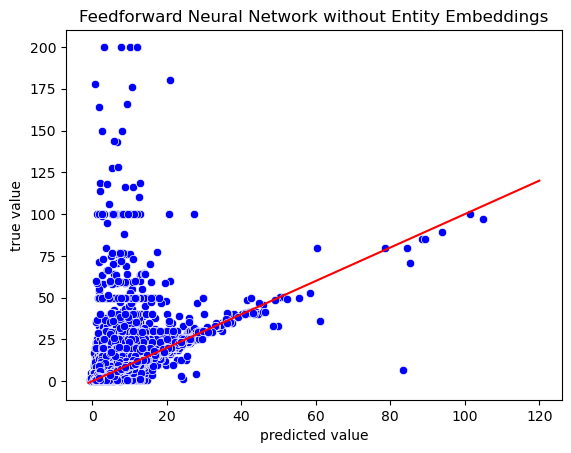

In [20]:
errors = sns.scatterplot(data = error_df, x = 'NN_predicted', y = 'NN_true', color = 'b')
#plt.axhline(y = 0, color = 'r')
plt.plot([-1, 120], [-1, 120], c = 'r')
plt.title('Feedforward Neural Network without Entity Embeddings')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.savefig('NN_errors.png')

In [21]:
error_df.to_csv('NN_errors.csv')

In [19]:
#Visualization of epochs
loss = [18.3565, 15.699, 15.5651, 15.4852, 15.4442, 15.4096, 15.3822, 15.3546, 15.3422, 15.3130, 15.2964, 15.2840, 15.2732, 15.2515, 15.2426, 15.2193, 15.2143, 15.2009, 15.1863, 15.1788, 15.1809, 15.1839, 15.1683, 15.1385]
val_loss = [13.7413, 13.7285, 13.6259, 13.5764, 13.6047, 13.6029, 13.5317, 13.5272, 13.5001, 13.5139, 13.4928, 13.4980, 13.4977, 13.4929, 13.5003, 13.4699, 13.5577, 13.4911, 13.4498, 13.5046, 13.5147, 13.4583, 13.4660, 13.4596]
loss = [sqrt(x) for x in loss]
val_loss = [sqrt(x) for x in val_loss]

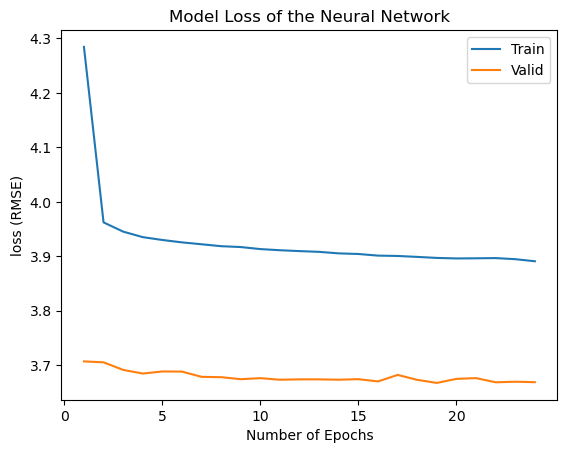

In [21]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss of the Neural Network')
plt.ylabel('loss (RMSE)')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.xticks([-1, 4, 9, 14, 19], [0, 5, 10, 15, 20])
plt.savefig('ModelLossNNwoutEE.png')
plt.show()